In [1]:
from default import *


Using TensorFlow backend.


shape of encoded (None, 4, 4, 8)
shape of decoded (None, 28, 28, 1)
4.90651438239 norm
4.93280520495 norm
4.91637516322 norm
4.89748164727 norm
4.88391462316 norm
4.86503304385 norm
4.89797481061 norm
4.9285246181 norm
4.89394802266 norm
4.84426020366 norm
(1960, 128) digits
(20, 128) good digits
[  1.00000000e+00   1.79195597e-14   2.65297206e-09   5.38580847e-11
   5.96311611e-11   3.10674220e-09   3.57353203e-10   2.06974650e-12
   1.21392774e-11   1.58306174e-10] preds
0.929054 activation mean
0.22793 activation sd


In [2]:
import numpy.linalg as nla
import scipy.linalg as sla
target=tf.placeholder("float",shape=(10,))

generator = Sequential([decoder,cnn])
generatorPre = Sequential([decoder]+cnn.layers[:-1])
gradients = tf.gradients(generator.output, generator.input,grad_ys=target)
good_mean,good_cov,good_samples=mean_cov(encoded,lower_thresh=.15,upper_thresh=4)

4.90651438239 norm
4.93280520495 norm
4.91637516322 norm
4.89748164727 norm
4.88391462316 norm
4.86503304385 norm
4.89797481061 norm
4.9285246181 norm
4.89394802266 norm
4.84426020366 norm
(1960, 128) digits
(754, 128) good digits


In [3]:
import time
import numpy.linalg as nla
import numpy.random as nrand

zcov = np.abs(cov).sum(axis=1)==0
zmean = (mean==0)
cov_safe = cov +np.eye(len(zcov))
cho=sla.cho_factor(cov_safe)

def getLL(points):
    centered=(points.reshape(-1,128)-mean[np.newaxis,:])
    return -(centered.T*sla.cho_solve(cho,centered.T)).sum(axis=0)

def getLLgradient(points):
    centered = (points.reshape(-1,128)-mean[np.newaxis,:])
    grads = -sla.cho_solve(cho,centered.T).T
    return grads.reshape(-1,4,4,8)

def getCentered(points):
    centered=(points.reshape(-1,128)-mean[np.newaxis,:])
    return centered


target_array = np.zeros(10)
target_array[0] = 1

def getActivations(arr):
    global generator,target_array
    return (generator.predict(arr)*target_array).sum(axis=1)

def norm(arr):
    for i in range(len(arr.shape)-1):
        arr=nla.norm(arr,axis=-1)
    return arr+1e-8

def normalized(a):
    return a/norm(a)[:,None,None,None]
        
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

def optimizeSamples(samples,num_iters=10,step_size=1e-5):
    sess = K.get_session()
    current = samples.copy()
    for i in range(num_iters):
        fd={generator.input:current,K.learning_phase(): 0,target:target_array}
        evaluated_gradients = sess.run(gradients,feed_dict=fd)[0]
        ll_gradients = getLLgradient(current)
        #current-=step_size*nla.norm(evaluated_gradients)
        #current+=step_size*(0*nla.norm(evaluated_gradients)+nla.norm(ll_gradients))
        current+= 1e-2 *evaluated_gradients + 1e-3 * ll_gradients
    return current


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return true;
}

<IPython.core.display.Javascript object>

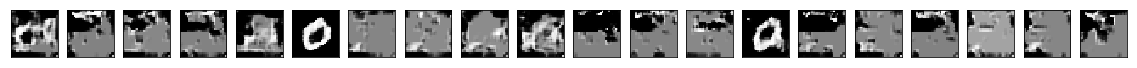

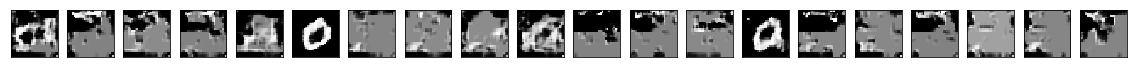

[  2.19472572e-01   1.06002286e-01   1.06002286e-01   1.06002286e-01
   1.25277996e-01   1.00000000e+00   1.06002286e-01   1.06002286e-01
   1.06002286e-01   2.13836774e-01   1.06002286e-01   1.06002286e-01
   1.06002286e-01   9.99944806e-01   1.05391234e-01   1.06002286e-01
   1.06002286e-01   1.06002286e-01   1.06002286e-01   1.02648258e-01
   1.06002286e-01   1.06002286e-01   1.06002286e-01   1.06002286e-01
   1.05235420e-01   1.06002286e-01   5.23639433e-02   1.06002286e-01
   1.03488863e-01   9.99672294e-01   9.07627583e-01   1.06002286e-01
   1.08665645e-01   1.06002286e-01   4.31433141e-01   7.01877236e-01
   5.19995354e-02   2.64784768e-02   1.06002286e-01   1.25655890e-01
   1.06002286e-01   1.06002286e-01   1.06002286e-01   1.06002286e-01
   1.00000000e+00   1.06002286e-01   1.06002286e-01   1.06002286e-01
   1.06002286e-01   1.11139409e-01   1.06002286e-01   5.53899050e-01
   1.06002286e-01   1.05649963e-01   1.42233655e-01   1.06002286e-01
   1.84020817e-01   7.00619161e-01

In [5]:
def print_images(decoded_imgs,max_num=20):
    n = min(max_num,len(decoded_imgs))
    for i in range(n):
        if i%20 == 0:
            plt.figure(figsize=(20, 4))
        # display reconstruction
        ax = plt.subplot(2, 20, i %20 + 1 )
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i%20 == 19:
            plt.show()
    plt.show()

def print_codes(codes,max_num=20):
    print_images(decoder.predict(codes),max_num)

opt_samples = optimizeSamples(good_samples)
print_images(decoder.predict(good_samples))
print_images(decoder.predict(opt_samples))
print(getActivations(good_samples))
print(getActivations(opt_samples))
print(getLL(good_samples))
print(getLL(opt_samples))


(15, 4, 4, 8)


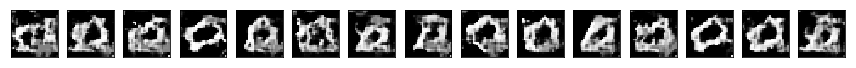

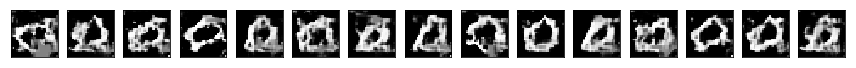

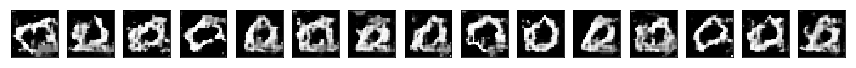

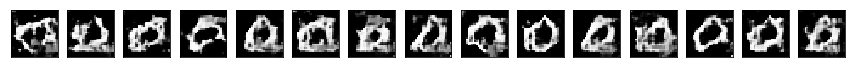

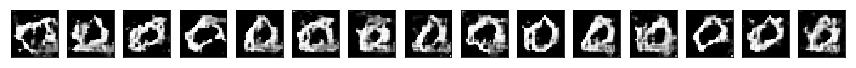

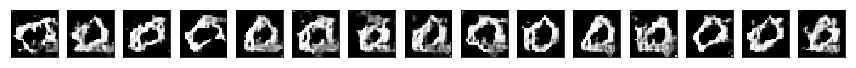

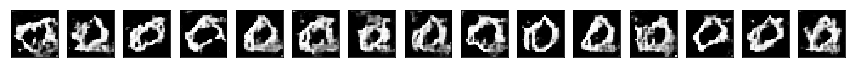

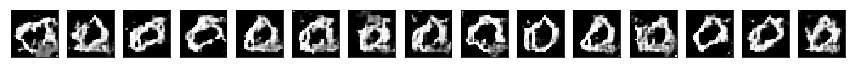

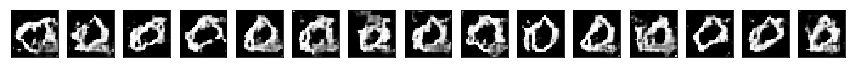

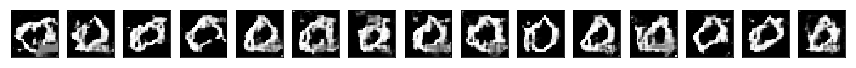

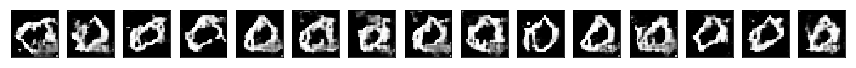

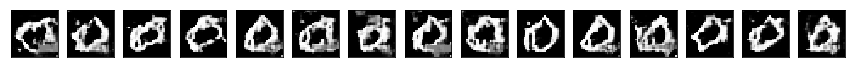

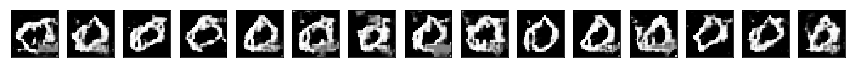

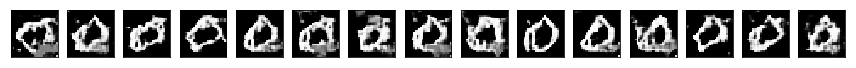

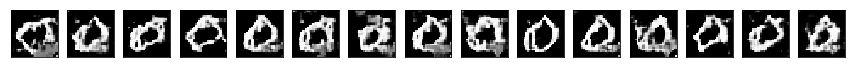

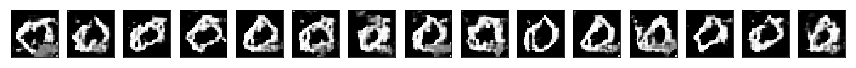

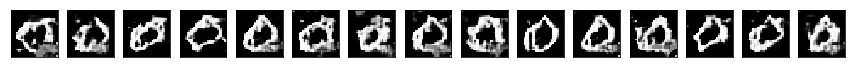

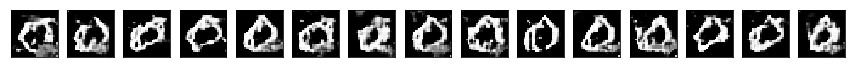

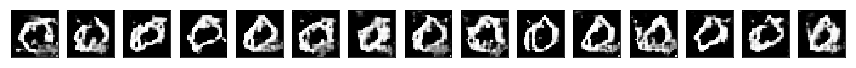

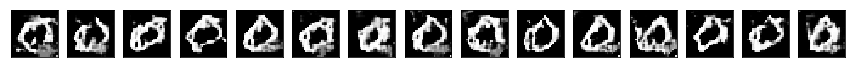

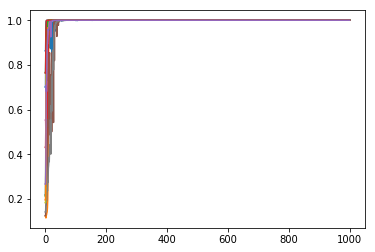

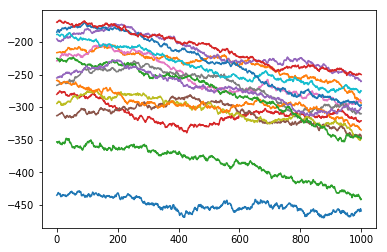

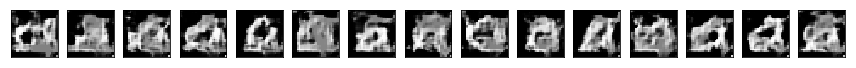

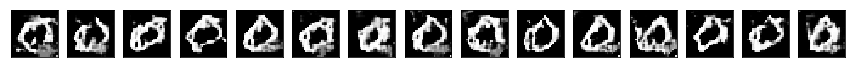

[-435.02311582 -216.48537485 -353.27187194 -280.37498012 -195.48832667
 -313.10601153 -229.06304572 -266.63761451 -294.43956838 -188.52415693
 -185.15359335 -258.9434316  -225.19157221 -169.80974346 -255.27985222]
[-459.1533215  -293.72807684 -441.35134206 -320.8957791  -260.27799389
 -345.06274752 -290.36011662 -310.15548636 -347.92389391 -275.16642362
 -296.7258965  -335.21822312 -346.91350826 -250.10775293 -300.57375842]


In [6]:
def filterMedActs(samples):
    acts=getActivations(samples)
    return samples[np.logical_and(.12<acts,acts<.9)]

print(filterMedActs(good_samples).shape)
generatorPre = Sequential(decoder.layers+cnn.layers[:-1]+[Activation("linear")])
target=tf.placeholder("float",shape=(None,10,))

def chartSamples(samples,num_iters=1000,num_sub=1,step_size=1e-1):
    step_size/=num_sub
    sess = K.get_session()
    current = samples.copy()
    activation_history = [getActivations(current)]
    ll_history = [getLL(current)]
    target=tf.placeholder("float",shape=(None,10,))
    target_array = np.zeros((samples.shape[0],10))
    target_array[:,0] = 1
    gradients = tf.gradients(generatorPre.output, generatorPre.input,grad_ys=target)
    for i in range(num_iters):
        fd={generatorPre.input:current,K.learning_phase(): 0,target:target_array}
        evaluated_gradients = sess.run(gradients,feed_dict=fd)[0]
        #print(evaluated_gradients)
        ll_gradients = getLLgradient(current)
        #print(i,norm(evaluated_gradients))
        norm_eg=normalized(evaluated_gradients)
        norm_ll=normalized(ll_gradients)
        noise = nrand.normal(size=samples.shape)
        for _ in range(num_sub):
            #current-=step_size*nla.norm(evaluated_gradients)
            #current+=step_size*(0*nla.norm(evaluated_gradients)+nla.norm(ll_gradients))
            #current+=step_size*(nla.norm(ll_gradients))
            #current+=step_size*ll_gradients
            activations = getActivations(current)
            current+=step_size*(1 * norm_eg + .3 * activations[:,None,None,None] * noise + 1e-3 * norm_ll)
            #print(nla.norm(evaluated_gradients,axis=1))
            #current+= step_size * nla.norm(evaluated_gradients)
            activation_history += [activations]
            ll_history +=[getLL(current)]
        
        if (i+1)%50==0:
            print_codes(current)
            pass
            #current = (current + recoder.predict(current))/2
            
    for row in np.array(activation_history).T:
        plt.plot(row)
    plt.show()
    for row in np.array(ll_history).T:
        plt.plot(row)
    plt.show()
    return current
mediums=filterMedActs(good_samples)
medium_opt=chartSamples(mediums)
print_codes(mediums)
print_codes(medium_opt)
#print(getActivations(mediums))
print(getLL(mediums))
#print(getActivations(medium_opt))
print(getLL(medium_opt))

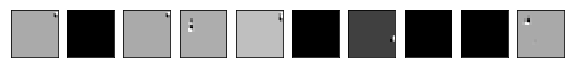

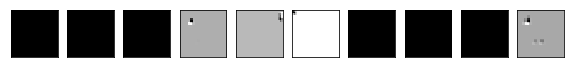

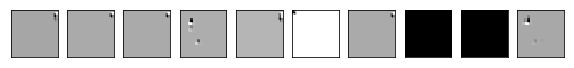

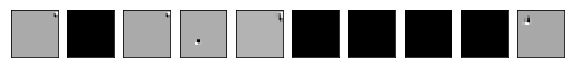

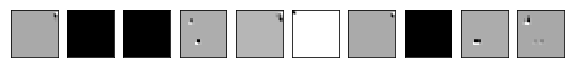

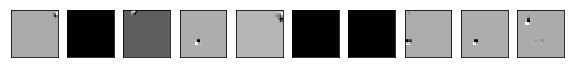

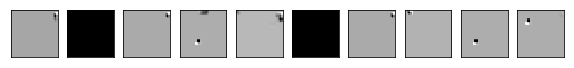

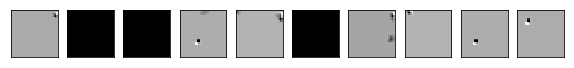

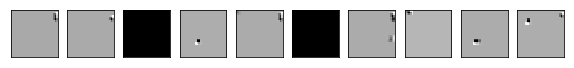

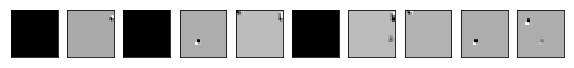

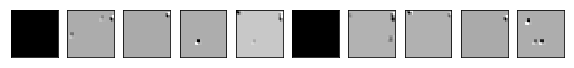

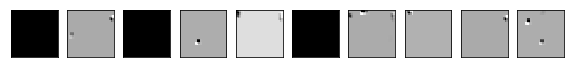

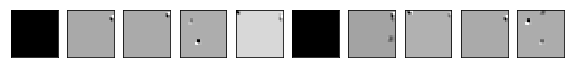

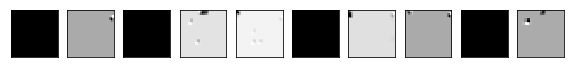

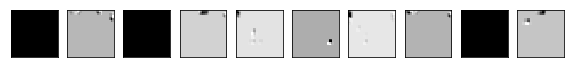

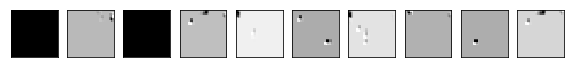

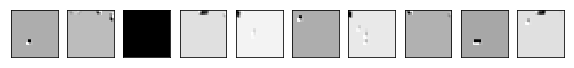

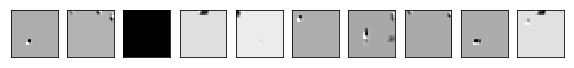

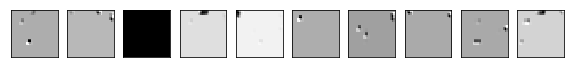

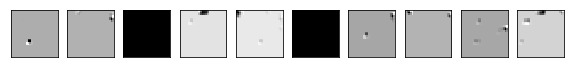

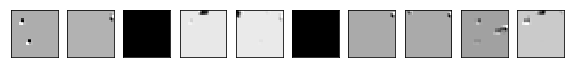

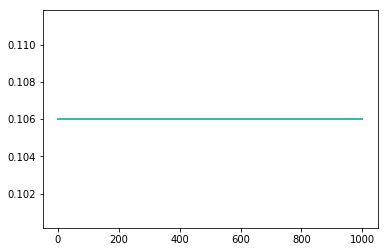

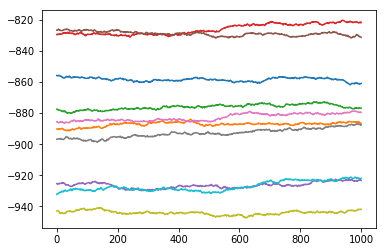

array([[[[ -5.55702783e-02,   3.59394610e-01,   2.20659590e+00, ...,
           -1.52067736e-01,  -1.26630023e-01,   8.90616798e+00],
         [  8.46556276e-02,   4.52287346e-02,   1.95523441e-01, ...,
            7.85471275e-02,   5.87449316e-03,   8.93444061e+00],
         [ -7.46450946e-02,   2.36503733e-03,  -2.94987597e-02, ...,
            5.75620569e-02,  -3.79319750e-02,   9.63434982e+00],
         [ -3.97836491e-02,   1.56570539e-01,   4.40822363e-01, ...,
           -2.75632497e-02,   1.70005202e+00,   7.89867783e+00]],

        [[ -2.56665908e-02,  -5.26746958e-02,   1.67447436e+00, ...,
           -8.19837898e-02,  -6.34996500e-03,   6.98946762e+00],
         [  6.15399517e-02,  -1.07079400e-02,  -1.38073131e-01, ...,
            5.88753959e-03,  -4.62805741e-02,   6.81822109e+00],
         [  3.53312977e-02,   1.38633147e-01,  -6.46861121e-02, ...,
           -1.38689026e-01,   1.08342931e-01,   7.38407183e+00],
         [  2.77294088e-02,  -1.57258119e-02,   6.52672723e-

In [7]:
#white_noise = nrand.uniform(size=(10,28,28,1))
#print_codes(encoder.predict(white_noise))
#chartSamples(encoder.predict(white_noise))